In [227]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**Import raw data**

In [228]:
data=pd.read_csv("../../Study_Hopsking/raw_data/raw_data.csv")

df=pd.DataFrame(data)

df["DateTime"]=pd.to_datetime(df["DateTime"])

data

,Unnamed: 0,DateTime,RealPower,EV_Power,Timestamp
0,26400,2019-04-01 00:00:00,50.676,0.0,1554076800000000000
1,26399,2019-04-01 00:15:00,51.186,0.0,1554077700000000000
2,26398,2019-04-01 00:30:00,51.873,0.0,1554078600000000000
3,26397,2019-04-01 00:45:00,50.980,0.0,1554079500000000000
4,26396,2019-04-01 01:00:00,51.912,0.0,1554080400000000000
...,...,...,...,...,...
26396,4,2019-12-31 23:00:00,38.493,0.0,1577833200000000000
26397,3,2019-12-31 23:15:00,38.577,0.0,1577834100000000000
26398,2,2019-12-31 23:30:00,38.619,0.0,1577835000000000000
26399,1,2019-12-31 23:45:00,38.394,0.0,1577835900000000000


In [229]:
del df["Unnamed: 0"]

**First input: month**

In [230]:
df["month"]=df["DateTime"].dt.month

def find_season(month):
    if 3 <= month <= 5:
        return "spring"
    elif 6 <= month <= 8:
        return "summer"
    elif 9 <= month <= 11:
        return "fall"
    else:
        return "winter"

df["season"]= df["month"].apply(find_season)

df

,DateTime,RealPower,EV_Power,Timestamp,month,season
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,spring
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,spring
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,spring
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,spring
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,spring
...,...,...,...,...,...,...
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,winter
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,winter
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,winter
26399,2019-12-31 23:45:00,38.394,0.0,1577835900000000000,12,winter


*convert column season into dummies*

In [231]:
season_dummies = pd.get_dummies(df['season'], prefix='season')

df = pd.concat([df, season_dummies], axis=1)

del df["season"]

df

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False
...,...,...,...,...,...,...,...,...,...
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True
26399,2019-12-31 23:45:00,38.394,0.0,1577835900000000000,12,False,False,False,True


**Second input: Vacations**

In [232]:
df['month_day'] = df['DateTime'].dt.strftime('%m-%d')

df["day"]=df["DateTime"].dt.day

def find_vacation(month_day):

    if "12-14" < month_day <= "12-31":
        return True
    elif "06-15" <= month_day < "09-26":
        return True
    elif month_day == "11-11":
        return True
    elif "11-28" <= month_day <= "11-29":
        return True
    elif month_day == "09-02":
        return True
    elif month_day == "07-04":
        return True
    elif month_day == "05-27":
        return True
    else:
        return False

df["Vacation"] = df["month_day"].apply(find_vacation)

df


,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,day,Vacation
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,1,False
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,1,False
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,1,False
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,1,False
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,31,True
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,31,True
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,31,True
26399,2019-12-31 23:45:00,38.394,0.0,1577835900000000000,12,False,False,False,True,12-31,31,True


**Third input: summer classes**

In [233]:
def obtener_vaciones(month_day):

    if  "07-01"<= month_day <= "08-03":
        return 1
    elif  "08-05"<= month_day <= "09-07":
        return 1
    else:
        return 0
    
df["summer_classes"]=df["month_day"].apply(obtener_vaciones)
df

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,day,Vacation,summer_classes
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,1,False,0
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,1,False,0
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,1,False,0
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,1,False,0
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,31,True,0
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,31,True,0
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,31,True,0
26399,2019-12-31 23:45:00,38.394,0.0,1577835900000000000,12,False,False,False,True,12-31,31,True,0


**Fourth input and Fifth: Sun duration and Temperature**

In [234]:
sun=pd.read_csv("../../data_sunrise\sunrise.csv", sep=";")

sun=pd.DataFrame(sun)

sun["Sunrise"]=sun["Sunrise"].str.extract("(\d+:\d+ [apmAPM]+)")
sun["Sunset"]=sun["Sunset"].str.extract("(\d+:\d+ [apmAPM]+)")

sun=sun.rename(columns={"Fecha":"DateTime"})

sun['DateTime'] = pd.to_datetime(sun['DateTime'], dayfirst=True)

sun

,DateTime,Sunrise,Sunset,Length
0,2019-12-01,6:32 am,4:42 pm,10:09:36
1,2019-12-02,6:33 am,4:42 pm,10:08:41
2,2019-12-03,6:34 am,4:42 pm,10:07:49
3,2019-12-04,6:35 am,4:42 pm,10:06:59
4,2019-12-05,6:36 am,4:42 pm,10:06:12
...,...,...,...,...
360,2019-01-27,6:46 am,5:16 pm,10:30:05
361,2019-01-28,6:45 am,5:17 pm,10:31:35
362,2019-01-29,6:45 am,5:18 pm,10:33:07
363,2019-01-30,6:44 am,5:19 pm,10:34:40


In [235]:
temp=pd.read_csv("../../data.csv",sep=";")

temp = pd.DataFrame(temp)

temp=temp.rename(columns={"Date": "DateTime"})

temp["DateTime"] = pd.to_datetime(temp["DateTime"], format="%d/%m/%Y")

temp = temp[(temp['DateTime'] < '1939-07-01') | (temp['DateTime'] >= '2019-04-01')]

temp

,DateTime,Min Temp (C),Max Temp (C),Avg Temp (C)
29129,2019-04-01,16.10,25.60,20.85
29130,2019-04-02,15.00,18.90,16.95
29131,2019-04-03,15.00,19.40,17.20
29132,2019-04-04,14.40,19.40,16.90
29133,2019-04-05,13.30,19.40,16.35
...,...,...,...,...
29399,2019-12-27,6.67,16.67,11.67
29400,2019-12-28,7.22,16.67,11.94
29401,2019-12-29,7.22,17.22,12.22
29402,2019-12-30,10.00,17.78,13.89


In [236]:
df_comb=pd.merge(temp, sun, on="DateTime", how="outer")

df_comb=pd.DataFrame(df_comb)

df_comb["DateTime"]=pd.to_datetime(df_comb["DateTime"])

df_comb=df_comb.dropna(subset="Min Temp (C)")

df_comb["Date"]=df_comb["DateTime"].dt.date

del df_comb["DateTime"]

df_comb

,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length,Date
0,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48,2019-04-01
1,15.00,18.90,16.95,6:35 am,7:09 pm,12:33:48,2019-04-02
2,15.00,19.40,17.20,6:34 am,7:10 pm,12:35:48,2019-04-03
3,14.40,19.40,16.90,6:32 am,7:10 pm,12:37:48,2019-04-04
4,13.30,19.40,16.35,6:31 am,7:11 pm,12:39:47,2019-04-05
...,...,...,...,...,...,...,...
270,6.67,16.67,11.67,6:49 am,4:50 pm,10:00:36,2019-12-27
271,7.22,16.67,11.94,6:49 am,4:50 pm,10:00:54,2019-12-28
272,7.22,17.22,12.22,6:50 am,4:51 pm,10:01:15,2019-12-29
273,10.00,17.78,13.89,6:50 am,4:52 pm,10:01:39,2019-12-30


*Merge both data set*

In [237]:
df["Date"]=df["DateTime"].dt.date

df_mix=pd.merge(df, df_comb, on="Date")

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,day,Vacation,summer_classes,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,6:36 am,7:08 pm,12:31:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,6:50 am,4:52 pm,10:02:05


*Input "Theres_sun" :*

*Indicates in which hour of the day the sun shines*

In [238]:
df_mix=pd.DataFrame(df_mix)

df_mix['DateTime']=pd.to_datetime(df_mix['DateTime'])

df_mix["Sunrise"]=pd.to_datetime(df_mix['Sunrise']).dt.time

df_mix["Sunset"]=pd.to_datetime(df_mix["Sunset"]).dt.time

df_mix

C:\Users\giuliana\AppData\Local\Temp\ipykernel_10656\2741845146.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mix["Sunrise"]=pd.to_datetime(df_mix['Sunrise']).dt.time
C:\Users\giuliana\AppData\Local\Temp\ipykernel_10656\2741845146.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mix["Sunset"]=pd.to_datetime(df_mix["Sunset"]).dt.time


,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,day,Vacation,summer_classes,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,1,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,31,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05


In [239]:
def is_sunny(row):
    sunrise=row["Sunrise"]
    sunset=row["Sunset"]
    time=row["DateTime"].time()
    if sunrise < time < sunset:
        return True
    else:
        return False
    
df_mix["Theres_sun"]=df_mix.apply(is_sunny, axis=1)

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,...,Vacation,summer_classes,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Length,Theres_sun
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,False
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,False
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,False
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,False
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,12:31:48,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,False
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,False
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,False
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,10:02:05,False


In [240]:
df_mix["half_length"] = pd.to_timedelta(df_mix["Length"])/2

df_mix['cenit_time_seconds'] = df_mix['half_length'].dt.total_seconds()

df_mix['cenit_time_formatted'] = pd.to_datetime(df_mix['cenit_time_seconds'], unit='s').dt.strftime('%H:%M:%S')

df_mix['cenit_time_formatted'] = pd.to_timedelta(df_mix['cenit_time_formatted'])

df_mix['Sunrise'] = pd.to_timedelta(df_mix['Sunrise'].astype(str))

df_mix['cenit_time'] = df_mix['cenit_time_formatted'] + df_mix['Sunrise']

df_mix['cenit_time'] =  df_mix['cenit_time'].dt.components.hours.map("{:02}".format) + ':' + \
                        df_mix['cenit_time'].dt.components.minutes.map("{:02}".format) + ':' + \
                        df_mix['cenit_time'].dt.components.seconds.map("{:02}".format)

df_mix['Sunrise'] = df_mix['Sunrise'].dt.components.hours.map("{:02}".format) + ':' + \
                    df_mix['Sunrise'].dt.components.minutes.map("{:02}".format) + ':' + \
                    df_mix['Sunrise'].dt.components.seconds.map("{:02}".format)

del df_mix["half_length"]
del df_mix["Length"]
del df_mix["cenit_time_formatted"]
del df_mix["cenit_time_seconds"]

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,...,Vacation,summer_classes,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Theres_sun,cenit_time
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,...,False,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,...,True,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02


In [241]:
from datetime import datetime, timedelta

df_mix["Sunrise"] = pd.to_datetime(df_mix["Sunrise"], format="%H:%M:%S").dt.time
df_mix["Sunset"] = pd.to_datetime(df_mix["Sunset"], format="%H:%M:%S").dt.time
df_mix["cenit_time"] = pd.to_datetime(df_mix["cenit_time"], format="%H:%M:%S").dt.time

def determine_temp(row):
    current_time = row["DateTime"].time()
    sunrise_time = row["Sunrise"]
    suma_final_time_minus_30 = (datetime.combine(datetime.today(), row["cenit_time"]) - timedelta(minutes=30)).time()
    suma_final_time_plus_30 = (datetime.combine(datetime.today(), row["cenit_time"]) + timedelta(minutes=30)).time()
    sunset_time = row["Sunset"]

    if sunrise_time < current_time < suma_final_time_minus_30:
        return row["Avg Temp (C)"]
    
    elif suma_final_time_minus_30 <= current_time <= suma_final_time_plus_30:
        return row["Max Temp (C)"]
    
    elif suma_final_time_plus_30 < current_time < sunset_time:
        return row["Avg Temp (C)"]
    
    else:
        return row["Min Temp (C)"]

df_mix.loc[:, "temp"] = df_mix.apply(lambda row: determine_temp(row), axis=1)

df_mix


,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,month_day,...,summer_classes,Date,Min Temp (C),Max Temp (C),Avg Temp (C),Sunrise,Sunset,Theres_sun,cenit_time,temp
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,04-01,...,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54,16.10
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,04-01,...,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54,16.10
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,04-01,...,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54,16.10
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,04-01,...,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54,16.10
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,04-01,...,0,2019-04-01,16.10,25.60,20.85,06:36:00,19:08:00,False,12:51:54,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,12-31,...,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02,8.89
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,12-31,...,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02,8.89
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,12-31,...,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02,8.89
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,12-31,...,0,2019-12-31,8.89,23.33,16.11,06:50:00,16:52:00,False,11:51:02,8.89


In [242]:
del df_mix["Min Temp (C)"]
del df_mix["Max Temp (C)"]
del df_mix["Avg Temp (C)"]
del df_mix["cenit_time"]
del df_mix["Sunrise"]
del df_mix["Sunset"]
del df_mix["Date"]
del df_mix["month_day"]

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,1,False,0,False,16.10
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,1,False,0,False,16.10
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,1,False,0,False,16.10
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,1,False,0,False,16.10
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,1,False,0,False,16.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,8.89
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,8.89
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,8.89
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,8.89


**Change of input: Past Temperature by one day**

In [243]:
df_mix["temp_ant"]=df_mix["temp"].shift(96)

del df_mix["temp"]

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,1,False,0,False,NaN
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,1,False,0,False,NaN
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,1,False,0,False,NaN
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,1,False,0,False,NaN
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,1,False,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0


**Sixth input: Hours**

In [244]:
df_mix['Hour'] = df_mix['DateTime'].dt.hour

**Seventh input: Average of power by hours per month**

*Analysis of April*

In [245]:
df_mix_dec=pd.DataFrame()

for i in range(len(df_mix)):
    if i < 2880:
        df_mix_dec = pd.concat([df_mix_dec, df_mix.iloc[[i]]])

df_mix_dec

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour
0,2019-04-01 00:00:00,50.676,0.00,1554076800000000000,4,False,True,False,False,1,False,0,False,NaN,0
1,2019-04-01 00:15:00,51.186,0.00,1554077700000000000,4,False,True,False,False,1,False,0,False,NaN,0
2,2019-04-01 00:30:00,51.873,0.00,1554078600000000000,4,False,True,False,False,1,False,0,False,NaN,0
3,2019-04-01 00:45:00,50.980,0.00,1554079500000000000,4,False,True,False,False,1,False,0,False,NaN,0
4,2019-04-01 01:00:00,51.912,0.00,1554080400000000000,4,False,True,False,False,1,False,0,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2019-04-30 22:45:00,54.236,2.82,1556664300000000000,4,False,True,False,False,30,False,0,False,15.6,22
2876,2019-04-30 23:00:00,53.942,2.82,1556665200000000000,4,False,True,False,False,30,False,0,False,15.6,23
2877,2019-04-30 23:15:00,52.443,1.75,1556666100000000000,4,False,True,False,False,30,False,0,False,15.6,23
2878,2019-04-30 23:30:00,52.649,0.00,1556667000000000000,4,False,True,False,False,30,False,0,False,15.6,23


Text(0, 0.5, 'RealPower')

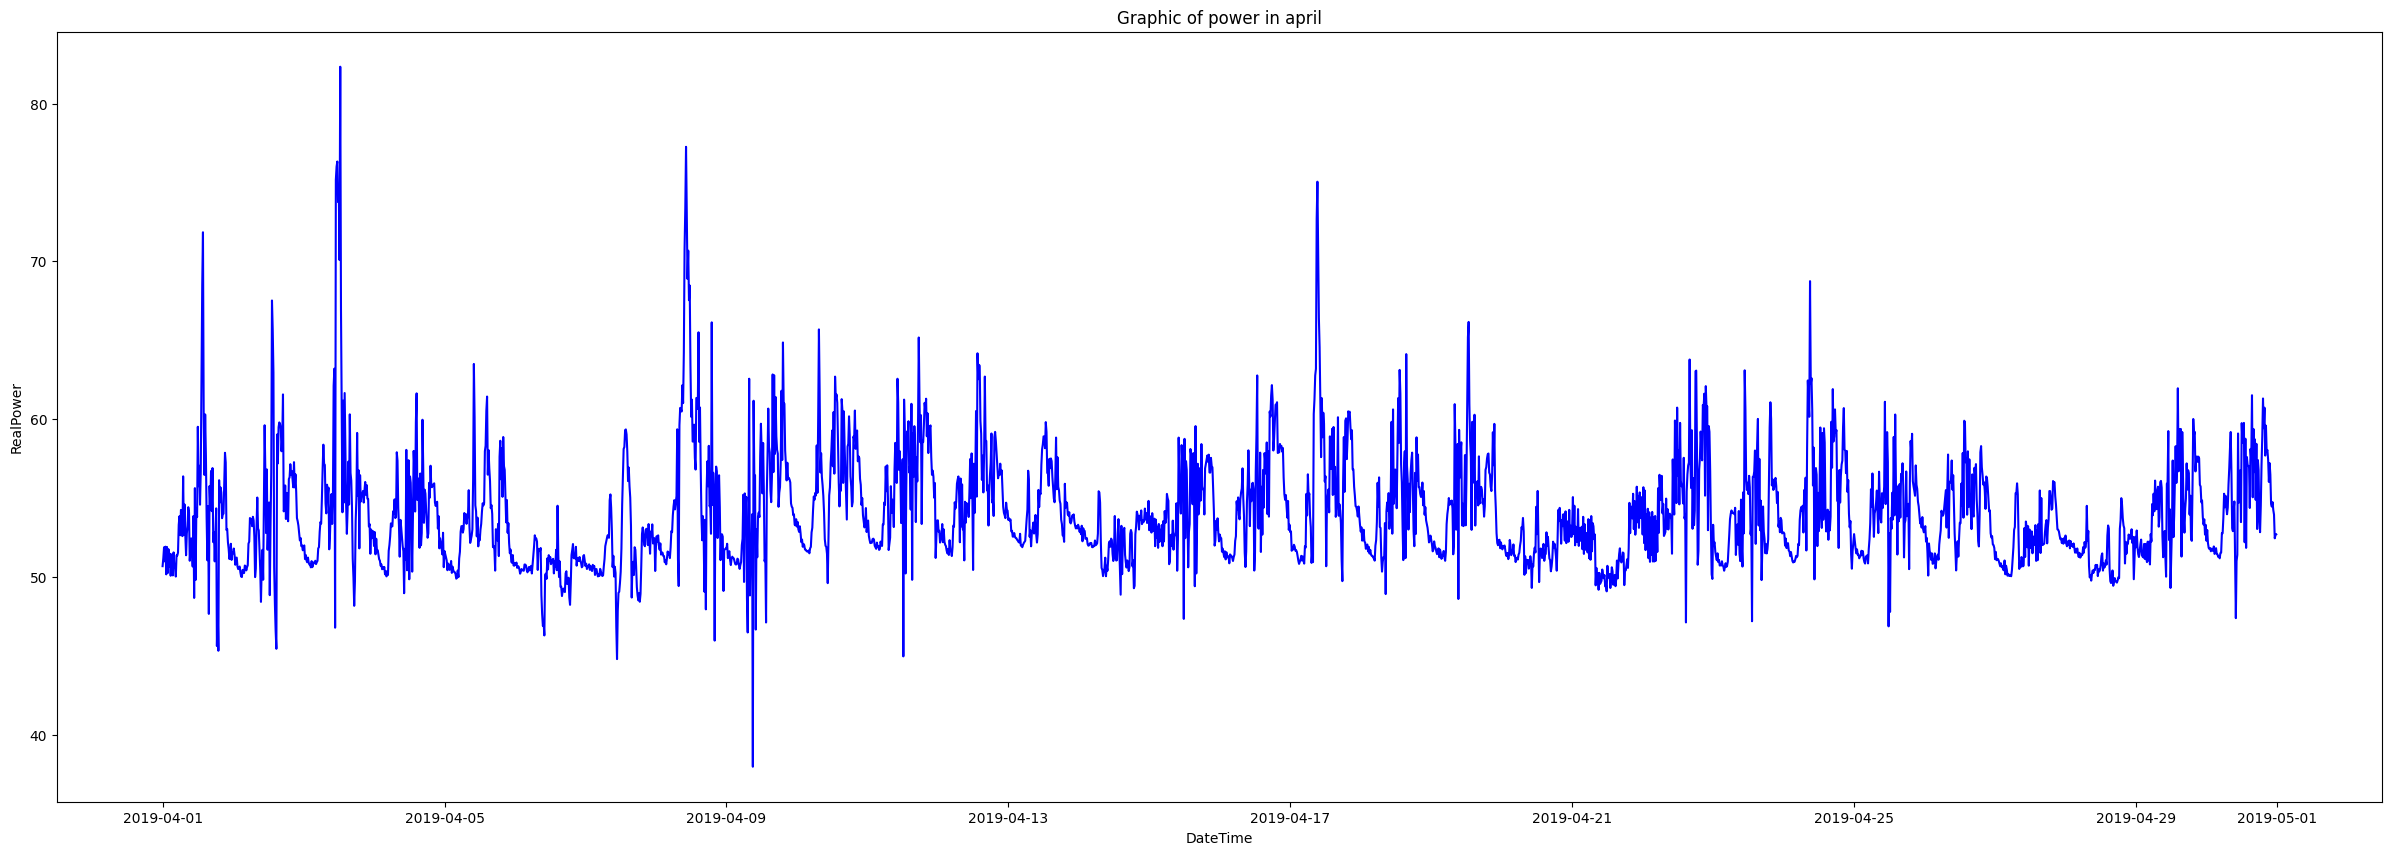

In [246]:
plt.figure(figsize=(30,10))
plt.plot(df_mix_dec['DateTime'], df_mix_dec['RealPower'], color='blue')
plt.title('Graphic of power in april')
plt.xlabel('DateTime')
plt.ylabel('RealPower')

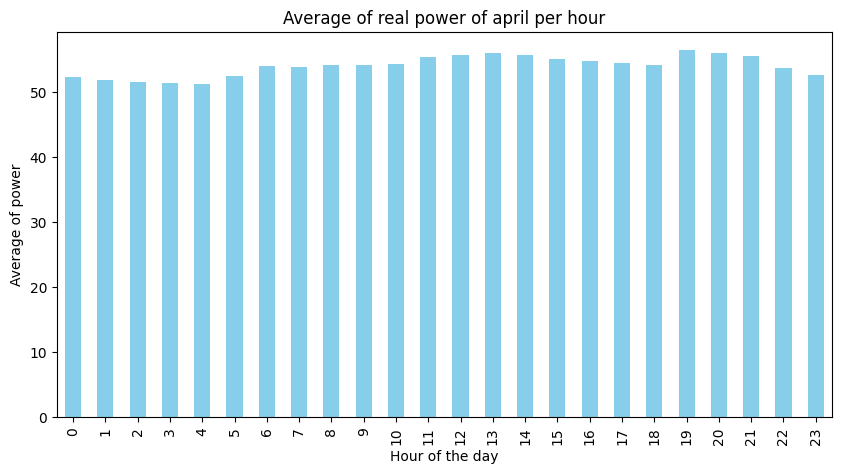

In [247]:
df_mix_dec["DateTime"] = pd.to_datetime(df_mix_dec["DateTime"])

Average_per_hour = df_mix_dec.groupby('Hour')['RealPower'].mean()

plt.figure(figsize=(10, 5))
Average_per_hour.plot(kind='bar', color='skyblue')
plt.title('Average of real power of april per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Average of power')
plt.show()

*This input will provide us with the average power consumption per hour for the month. For instance, if the power consumption at 8 am on Monday is 48 MW and on Tuesday it is 47 MW, the average power consumption for those two days will be 47.5 MW.*

In [248]:
df_mix["Average_hour_month"] = None

df_mix['DateTime'] = pd.to_datetime(df_mix['DateTime'])

df_mix['Hour'] = pd.to_numeric(df_mix['Hour'], errors='coerce')

df_mix['Hour_Month'] = df_mix['Hour'].astype(str) + '_' + df_mix['month'].astype(str)

df_mix['Average_hour_month'] = df_mix.groupby('Hour_Month')['RealPower'].transform('mean')

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Hour_Month
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0_4
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0_4
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0_4
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0_4
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,1,False,0,False,NaN,1,51.763875,1_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,22_12
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,23_12
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,23_12
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,23_12


**Eigth input: Comparasion of real power and average power**

In [249]:
df_mix["Its_higher_than_average"] = None

for i in range(len(df_mix)):
    
    if df_mix['RealPower'][i] < df_mix['Average_hour_month'][i] - 2:

        df_mix.at[i, 'Its_higher_than_average'] = 1

    elif df_mix['RealPower'][i] >= df_mix['Average_hour_month'][i] - 2 and df_mix['RealPower'][i] <= df_mix['Average_hour_month'][i]+2:

        df_mix.at[i, 'Its_higher_than_average'] = 0

    else:
        df_mix.at[i, 'Its_higher_than_average'] = 1

del df_mix["Hour_Month"]

df_mix
   

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,1,False,0,False,NaN,1,51.763875,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,0
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0


**Ninth input: Average of power by hours per day**

*The methodology remains the same, but now we're averaging by day instead of by month. This entails calculating the average power consumption per hour of the day*

In [250]:
df_mix["Average_hour_day"] = None

df_mix['Hour_month_day'] = df_mix['Hour'].astype(str) + '_' + df_mix['month'].astype(str) + '_' + df_mix['day'].astype(str)

df_mix['Average_hour_day'] = df_mix.groupby('Hour_month_day')['RealPower'].transform('mean')

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average,Average_hour_day,Hour_month_day
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0_4_1
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0_4_1
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0_4_1
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0_4_1
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,1,False,0,False,NaN,1,51.763875,0,51.05075,1_4_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,0,38.70800,22_12_31
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.52075,23_12_31
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.52075,23_12_31
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.52075,23_12_31


**Tenth input: Comparasion of real power and average power by hour per day**

In [251]:
df_mix["Its_higher_than_average_day"] = None

for i in range(len(df_mix)):
    
    if df_mix['RealPower'][i] < df_mix['Average_hour_day'][i] - 1:

        df_mix.at[i, 'Its_higher_than_average_day'] = 1

    elif df_mix['RealPower'][i] >= df_mix['Average_hour_day'][i] - 1 and df_mix['RealPower'][i] <= df_mix['Average_hour_day'][i]+1:

        df_mix.at[i, 'Its_higher_than_average_day'] = 0

    else:
        df_mix.at[i, 'Its_higher_than_average_day'] = 1

del df_mix["Hour_month_day"]

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average,Average_hour_day,Its_higher_than_average_day
0,2019-04-01 00:00:00,50.676,0.0,1554076800000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0
1,2019-04-01 00:15:00,51.186,0.0,1554077700000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0
2,2019-04-01 00:30:00,51.873,0.0,1554078600000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0
3,2019-04-01 00:45:00,50.980,0.0,1554079500000000000,4,False,True,False,False,1,False,0,False,NaN,0,52.269892,0,51.17875,0
4,2019-04-01 01:00:00,51.912,0.0,1554080400000000000,4,False,True,False,False,1,False,0,False,NaN,1,51.763875,0,51.05075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,0,38.70800,0
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.52075,0
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.52075,0
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.52075,0


**Correction of inputs: Average_hour_month	Its_higher_than_average	Average_hour_day	Its_higher_than_average_day**

In [252]:
df_mix['Average_hour_day_ant'] = df_mix['Average_hour_day'].shift(96)
df_mix['Its_higher_than_average_day_ant'] = df_mix['Its_higher_than_average_day'].shift(96)

del df_mix["Average_hour_day"]
del df_mix["Its_higher_than_average_day"]

df_mix=df_mix.dropna(subset=["Average_hour_day_ant"])

df_mix

,DateTime,RealPower,EV_Power,Timestamp,month,season_fall,season_spring,season_summer,season_winter,day,Vacation,summer_classes,Theres_sun,temp_ant,Hour,Average_hour_month,Its_higher_than_average,Average_hour_day_ant,Its_higher_than_average_day_ant
96,2019-04-02 00:00:00,51.488,0.0,1554163200000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
97,2019-04-02 00:15:00,51.794,0.0,1554164100000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
98,2019-04-02 00:30:00,51.397,0.0,1554165000000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
99,2019-04-02 00:45:00,50.765,0.0,1554165900000000000,4,False,True,False,False,2,False,0,False,16.1,0,52.269892,0,51.17875,0
100,2019-04-02 01:00:00,51.206,0.0,1554166800000000000,4,False,True,False,False,2,False,0,False,16.1,1,51.763875,0,51.05075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,2019-12-31 22:45:00,38.313,0.0,1577832300000000000,12,False,False,False,True,31,True,0,False,10.0,22,40.184637,0,38.95800,0
26396,2019-12-31 23:00:00,38.493,0.0,1577833200000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0
26397,2019-12-31 23:15:00,38.577,0.0,1577834100000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0
26398,2019-12-31 23:30:00,38.619,0.0,1577835000000000000,12,False,False,False,True,31,True,0,False,10.0,23,40.048847,0,38.56300,0


In [224]:
df_mix.to_csv("df_mix.csv")